In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import datetime as dt


In [3]:
wd = '/Users/danielmsheehan/general_assembly/github/projects/project_6/capstone/data/'

df = pd.read_csv(f"{wd}/processing/basin_int_viirs_for_modeling.csv")
#df = df[df['region'] == 'Permian Region']  # select just permian basin
df.head(3)

,year_month,region,obs_day_cnt_avg,obs_day_cnt_med,obs_day_cnt_sum,obs_day_cnt_min,obs_day_cnt_max,qf_fit_day_avg_avg,qf_fit_day_avg_med,qf_fit_day_avg_sum,...,qf_fit_day_min_sum_per_squaremeters,qf_fit_day_min_min_per_squaremeters,qf_fit_day_min_max_per_squaremeters,qf_fit_day_max_avg_per_squaremeters,qf_fit_day_max_med_per_squaremeters,qf_fit_day_max_sum_per_squaremeters,qf_fit_day_max_min_per_squaremeters,qf_fit_day_max_max_per_squaremeters,month,oil_bbl_d_total_production
0,2012-03-01,Anadarko Region,13.041667,12.5,313,3,33,4.786164,4.291667,114.867926,...,0.0,0.0,0.0,4.185230e-10,4.505471e-10,1.004455e-08,0.0,7.023235e-10,2012-03-01,254203.561
1,2012-03-01,Appalachia Region,31.071429,32.0,870,1,86,9.502222,8.966184,266.062205,...,0.0,0.0,0.0,1.925259e-10,1.769157e-10,5.390726e-09,0.0,2.757804e-10,2012-03-01,32000.000
2,2012-03-01,Bakken Region,260.321429,249.0,7289,2,571,1.497039,1.500962,41.917086,...,0.0,0.0,0.0,2.919411e-10,3.725575e-10,8.174350e-09,0.0,5.807514e-10,2012-03-01,595203.806


In [4]:
# df = df.loc[df['index_right'].notnull()]
df['epochtime'] = (pd.to_datetime(df['year_month']) - dt.datetime(1970,1,1)).dt.total_seconds()

In [5]:
####
# CREATE A SEP. YEAR COLUMN AND SEP MONTH COLUMN. 
#### 

In [6]:
df.dtypes

year_month                              object
region                                  object
obs_day_cnt_avg                        float64
obs_day_cnt_med                        float64
obs_day_cnt_sum                          int64
                                        ...   
qf_fit_day_max_sum_per_squaremeters    float64
qf_fit_day_max_min_per_squaremeters    float64
qf_fit_day_max_max_per_squaremeters    float64
month                                   object
oil_bbl_d_total_production             float64
Length: 65, dtype: object

In [7]:
df.head(5)

,year_month,region,obs_day_cnt_avg,obs_day_cnt_med,obs_day_cnt_sum,obs_day_cnt_min,obs_day_cnt_max,qf_fit_day_avg_avg,qf_fit_day_avg_med,qf_fit_day_avg_sum,...,qf_fit_day_min_sum_per_squaremeters,qf_fit_day_min_min_per_squaremeters,qf_fit_day_min_max_per_squaremeters,qf_fit_day_max_avg_per_squaremeters,qf_fit_day_max_med_per_squaremeters,qf_fit_day_max_sum_per_squaremeters,qf_fit_day_max_min_per_squaremeters,qf_fit_day_max_max_per_squaremeters,month,oil_bbl_d_total_production
0,2012-03-01,Anadarko Region,13.041667,12.5,313,3,33,4.786164,4.291667,114.867926,...,0.000000e+00,0.0,0.000000e+00,4.185230e-10,4.505471e-10,1.004455e-08,0.0,7.023235e-10,2012-03-01,254203.5610
1,2012-03-01,Appalachia Region,31.071429,32.0,870,1,86,9.502222,8.966184,266.062205,...,0.000000e+00,0.0,0.000000e+00,1.925259e-10,1.769157e-10,5.390726e-09,0.0,2.757804e-10,2012-03-01,32000.0000
2,2012-03-01,Bakken Region,260.321429,249.0,7289,2,571,1.497039,1.500962,41.917086,...,0.000000e+00,0.0,0.000000e+00,2.919411e-10,3.725575e-10,8.174350e-09,0.0,5.807514e-10,2012-03-01,595203.8060
3,2012-03-01,Eagle Ford Region,48.538462,30.0,1262,1,209,1.046799,0.374157,27.216779,...,0.000000e+00,0.0,0.000000e+00,2.060932e-10,1.548677e-11,5.358424e-09,0.0,8.207991e-10,2012-03-01,506707.6120
4,2012-03-01,Haynesville Region,4.476190,2.0,94,1,15,8.188339,0.000000,171.955128,...,1.413864e-09,0.0,6.966864e-10,3.180949e-10,0.000000e+00,6.679993e-09,0.0,1.086011e-09,2012-03-01,52698.2258


In [8]:
X = df.drop(columns=[
    # 'region', 
    #'month_yyyymm', 
    #'rig_count', 
    #'index_right', 
    #'date_mscan_yyyymm',
    'oil_bbl_d_total_production',
    #'temp_bb_max',
    'month',
])

X = pd.get_dummies(X)

y = df['oil_bbl_d_total_production']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [9]:
X

,obs_day_cnt_avg,obs_day_cnt_med,obs_day_cnt_sum,obs_day_cnt_min,obs_day_cnt_max,qf_fit_day_avg_avg,qf_fit_day_avg_med,qf_fit_day_avg_sum,qf_fit_day_avg_min,qf_fit_day_avg_max,...,year_month_2020-01-01,year_month_2020-02-01,year_month_2020-03-01,region_Anadarko Region,region_Appalachia Region,region_Bakken Region,region_Eagle Ford Region,region_Haynesville Region,region_Niobrara Region,region_Permian Region
0,13.041667,12.5,313,3,33,4.786164,4.291667,114.867926,0.000000,15.444444,...,0,0,0,1,0,0,0,0,0,0
1,31.071429,32.0,870,1,86,9.502222,8.966184,266.062205,0.000000,42.400000,...,0,0,0,0,1,0,0,0,0,0
2,260.321429,249.0,7289,2,571,1.497039,1.500962,41.917086,0.000000,4.189956,...,0,0,0,0,0,1,0,0,0,0
3,48.538462,30.0,1262,1,209,1.046799,0.374157,27.216779,0.000000,5.384615,...,0,0,0,0,0,0,1,0,0,0
4,4.476190,2.0,94,1,15,8.188339,0.000000,171.955128,0.000000,34.000000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,300.000000,292.0,900,237,371,9.713328,9.410959,29.139984,8.772152,10.956873,...,0,0,1,0,0,1,0,0,0,0
675,19.666667,8.0,59,3,48,1.965278,0.729167,5.895833,0.666667,4.500000,...,0,0,1,0,0,0,1,0,0,0
676,1.000000,1.0,2,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
677,10.666667,13.0,32,4,15,6.447009,8.307692,19.341026,2.533333,8.500000,...,0,0,1,0,0,0,0,0,1,0


In [10]:
for c in X.columns:
    print(c)

obs_day_cnt_avg
obs_day_cnt_med
obs_day_cnt_sum
obs_day_cnt_min
obs_day_cnt_max
qf_fit_day_avg_avg
qf_fit_day_avg_med
qf_fit_day_avg_sum
qf_fit_day_avg_min
qf_fit_day_avg_max
qf_fit_day_med_avg
qf_fit_day_med_med
qf_fit_day_med_sum
qf_fit_day_med_min
qf_fit_day_med_max
qf_fit_day_sum_avg
qf_fit_day_sum_med
qf_fit_day_sum_sum
qf_fit_day_sum_min
qf_fit_day_sum_max
qf_fit_day_min_avg
qf_fit_day_min_med
qf_fit_day_min_sum
qf_fit_day_min_min
qf_fit_day_min_max
qf_fit_day_max_avg
qf_fit_day_max_med
qf_fit_day_max_sum
qf_fit_day_max_min
qf_fit_day_max_max
aland
obs_day_cnt_avg_per_squaremeters
obs_day_cnt_med_per_squaremeters
obs_day_cnt_sum_per_squaremeters
obs_day_cnt_min_per_squaremeters
obs_day_cnt_max_per_squaremeters
qf_fit_day_avg_avg_per_squaremeters
qf_fit_day_avg_med_per_squaremeters
qf_fit_day_avg_sum_per_squaremeters
qf_fit_day_avg_min_per_squaremeters
qf_fit_day_avg_max_per_squaremeters
qf_fit_day_med_avg_per_squaremeters
qf_fit_day_med_med_per_squaremeters
qf_fit_day_med_sum_per

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.score(X_train, y_train)

0.9379489669415978

In [13]:
model.score(X_test, y_test)

0.555796873611003

In [14]:
cross_val_score(model, X, y, cv=5).mean()

0.6471860732204171

In [15]:
regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

/Users/danielmsheehan/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [16]:
regressor.score(X_train, y_train)

0.9890789722684613

In [17]:
regressor.score(X_test, y_test)

0.9494597159070954

In [18]:
cross_val_score(regressor, X, y, cv=10).mean()

0.7768046899662492

In [19]:
X_train.shape

(509, 165)

In [20]:
X_test.shape

(170, 165)

In [21]:
extratrees = ExtraTreesRegressor(random_state=42, n_estimators=500)

extratrees.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)

In [22]:
extratrees.score(X_train, y_train)

1.0

In [23]:
extratrees.score(X_test, y_test)

0.9642602781759163

In [24]:
cross_val_score(extratrees, X, y, cv=10).mean()

0.842608761476526

In [25]:
extratrees.feature_importances_.sort

<function ndarray.sort>

In [26]:
important_features = pd.Series(data=extratrees.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

important_features.head(15)

# print(important_features.to_string())


region_Permian Region               0.558261
qf_fit_day_med_med                  0.104707
obs_day_cnt_sum_per_squaremeters    0.043876
qf_fit_day_med_avg                  0.041403
obs_day_cnt_avg                     0.029853
region_Eagle Ford Region            0.027019
obs_day_cnt_sum                     0.025910
obs_day_cnt_med                     0.024295
obs_day_cnt_max                     0.021937
qf_fit_day_med_sum                  0.013557
qf_fit_day_med_max                  0.012061
region_Appalachia Region            0.011857
qf_fit_day_sum_med                  0.011443
qf_fit_day_sum_avg                  0.008154
region_Haynesville Region           0.007730
dtype: float64

In [27]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

{'Anadarko Region': (0.4, 0.7607843137254902, 0.6470588235294118), 'Appalachia Region': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), 'Bakken Region': (0.5529411764705883, 0.6274509803921569, 0.796078431372549), 'Eagle Ford Region': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), 'Haynesville Region': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), 'Niobrara Region': (1.0, 0.8509803921568627, 0.1843137254901961), 'Permian Region': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451)}


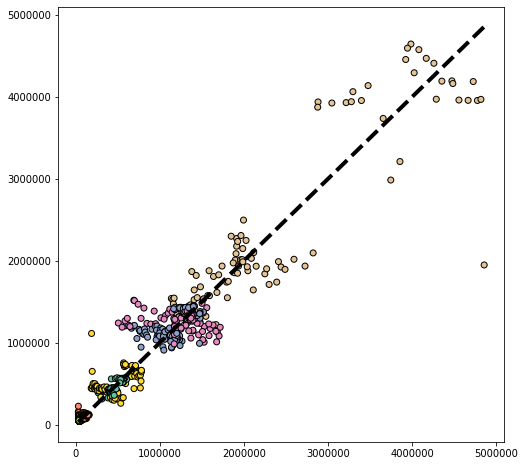

In [28]:
predicted = cross_val_predict(extratrees, X, y, cv=10)

color_labels = df['region'].unique()
# print(color_labels)
# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

print(color_map)

plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots()
plt.scatter(y, predicted, edgecolors=(0, 0, 0), c=df['region'].map(color_map))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.legend()
plt.show();

In [29]:
resids = y - predicted

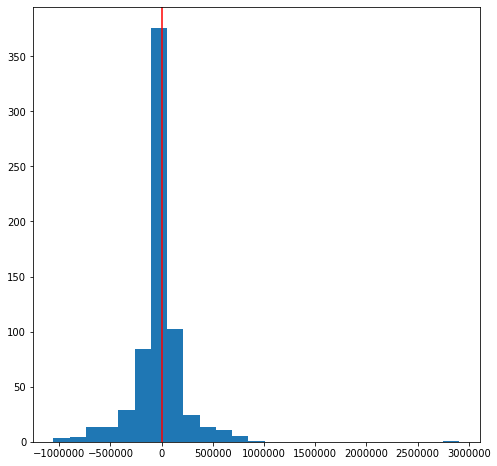

In [30]:
# Normality of residuals assumption
plt.figure(figsize=(8, 8))

plt.hist(resids, bins=25);
plt.axvline(0, color='red')

In [31]:
color_map

{'Anadarko Region': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Appalachia Region': (0.9882352941176471,
  0.5529411764705883,
  0.3843137254901961),
 'Bakken Region': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Eagle Ford Region': (0.9058823529411765,
  0.5411764705882353,
  0.7647058823529411),
 'Haynesville Region': (0.6509803921568628,
  0.8470588235294118,
  0.32941176470588235),
 'Niobrara Region': (1.0, 0.8509803921568627, 0.1843137254901961),
 'Permian Region': (0.8980392156862745,
  0.7686274509803922,
  0.5803921568627451)}

In [32]:
#{k, v for k, v in color_map.items()]

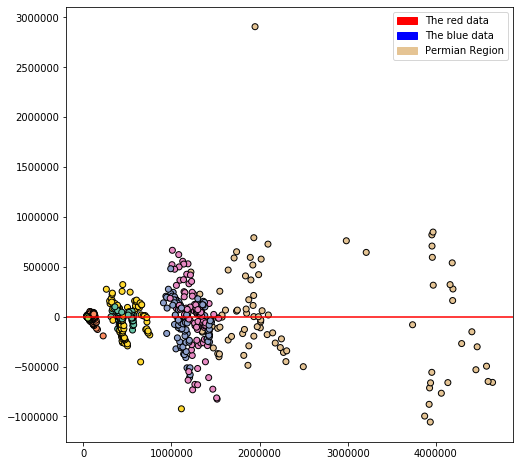

In [33]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 8))

plt.scatter(predicted, resids, edgecolors='black', c=df['region'].map(color_map))

#legend_elements = [Patch(facecolor='orange', edgecolor='r', label='Color Patch')]
plt.legend(handles=[
    mpatches.Patch(color='red', label='The red data'),
    mpatches.Patch(color='blue', label='The blue data'),
    mpatches.Patch(color=(0.8980392156862745,0.7686274509803922,0.5803921568627451), label='Permian Region'),
])
plt.axhline(0, color='red');

In [34]:
#df = df.set_index('year_month')

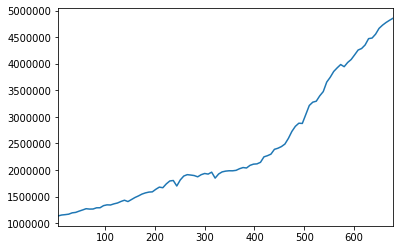

In [35]:
df[df['region'] == 'Permian Region']['oil_bbl_d_total_production'].plot()


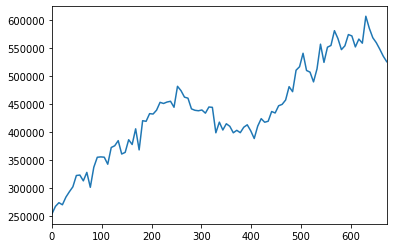

In [43]:
df[df['region'] == 'Anadarko Region']['oil_bbl_d_total_production'].plot()

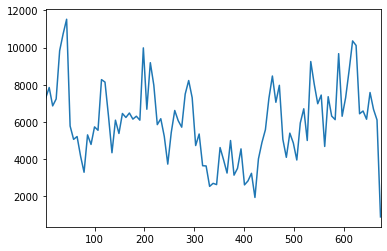

In [48]:
df[df['region'] == 'Bakken Region']['obs_day_cnt_sum'].plot()

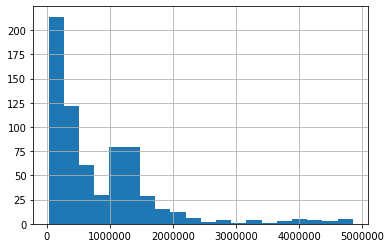

In [37]:
#df.set_index('month_yyyymm')
df['oil_bbl_d_total_production'].hist(bins=20)

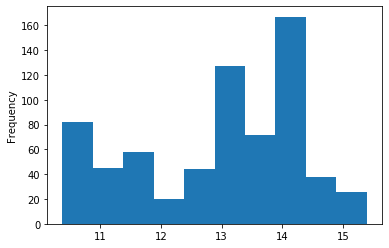

In [38]:
np.log(df['oil_bbl_d_total_production']).plot(kind='hist')

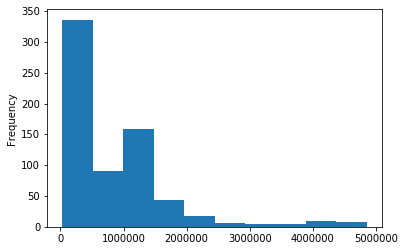

In [39]:
df['oil_bbl_d_total_production'].plot(kind='hist')

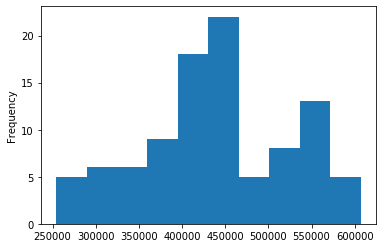

In [40]:
df[df['region'] == 'Anadarko Region']['oil_bbl_d_total_production'].plot(kind='hist')

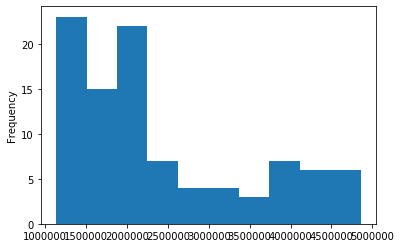

In [41]:
df[df['region'] == 'Permian Region']['oil_bbl_d_total_production'].plot(kind='hist')

In [42]:
# histograms of all the different regions. 


